In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
'''import math
import missingno as msno
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore') '''

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
#from sklearn.externals import joblib
import pickle
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense     

In [3]:
df=pd.read_csv("C:/Users/marve/Vidhyuth/Programming/Datasets/Jordan Weather/weather_data_24hr.csv")
df.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,1,2008-07-01,34,94,24,74,28,83,0.0,0.0,...,15,28,83,7,05:34 AM,07:47 PM,03:17 AM,06:24 PM,Waning Gibbous,89.7
1,1,2008-07-02,34,94,23,73,28,82,0.0,0.0,...,18,28,83,7,05:35 AM,07:47 PM,04:21 AM,07:29 PM,Waning Gibbous,82.8
2,1,2008-07-03,34,92,23,73,27,81,0.0,0.0,...,15,28,82,7,05:35 AM,07:46 PM,05:32 AM,08:24 PM,Waning Gibbous,75.9
3,1,2008-07-04,34,93,21,69,27,81,0.0,0.0,...,16,27,81,7,05:36 AM,07:46 PM,06:45 AM,09:10 PM,Last Quarter,69.0
4,1,2008-07-05,34,93,23,73,28,82,0.0,0.0,...,16,28,82,7,05:36 AM,07:46 PM,07:57 AM,09:48 PM,Last Quarter,62.1


In [4]:
df.isnull().sum()

loc_id               0
date                 0
maxtempC             0
maxtempF             0
mintempC             0
mintempF             0
avgtempC             0
avgtempF             0
totalprecipMM        0
totalprecipIn        0
windspeedMiles       0
windspeedKmph        0
sunhour              0
winddirdegree        0
winddir16point       0
weatherCode          0
weatherIconUrl       0
weatherDesc          0
humidity             0
visibilityKm         0
visibilityMiles      0
pressureMB           0
pressureInches       0
cloudcover           0
HeatIndexC           0
HeatIndexF           0
DewPointC            0
DewPointF            0
WindChillC           0
WindChillF           0
WindGustMiles        0
WindGustKmph         0
FeelsLikeC           0
FeelsLikeF           0
uvIndex              0
sunrise              0
sunset               0
moonrise             0
moonset              0
moon_phase           0
moon_illumination    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             14049 non-null  int64  
 1   date               14049 non-null  object 
 2   maxtempC           14049 non-null  int64  
 3   maxtempF           14049 non-null  int64  
 4   mintempC           14049 non-null  int64  
 5   mintempF           14049 non-null  int64  
 6   avgtempC           14049 non-null  int64  
 7   avgtempF           14049 non-null  int64  
 8   totalprecipMM      14049 non-null  float64
 9   totalprecipIn      14049 non-null  float64
 10  windspeedMiles     14049 non-null  int64  
 11  windspeedKmph      14049 non-null  int64  
 12  sunhour            14049 non-null  float64
 13  winddirdegree      14049 non-null  int64  
 14  winddir16point     14049 non-null  object 
 15  weatherCode        14049 non-null  int64  
 16  weatherIconUrl     140

In [6]:
df.describe()

,loc_id,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,...,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,moon_illumination
count,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,...,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000,14049.000000
mean,2.000000,26.736138,80.042921,15.075593,59.065770,20.448929,68.803829,0.673748,0.026474,7.291622,...,7.438964,45.391772,20.121076,68.205566,10.225568,16.454694,20.174888,68.297886,5.519112,48.286739
std,0.816526,8.157306,14.672466,6.370935,11.462742,7.054749,12.686674,3.154897,0.124216,2.992709,...,5.982332,10.754944,7.552950,13.598022,4.030124,6.476826,7.613433,13.704725,1.537661,29.829001
min,1.000000,3.000000,37.000000,-6.000000,20.000000,1.000000,34.000000,0.000000,0.000000,1.000000,...,-23.000000,-10.000000,-6.000000,22.000000,2.000000,3.000000,-6.000000,22.000000,1.000000,0.000000
25%,1.000000,20.000000,68.000000,10.000000,49.000000,14.000000,58.000000,0.000000,0.000000,5.000000,...,4.000000,38.000000,14.000000,57.000000,7.000000,12.000000,14.000000,57.000000,4.000000,20.700000
50%,2.000000,28.000000,82.000000,15.000000,60.000000,21.000000,70.000000,0.000000,0.000000,7.000000,...,8.000000,46.000000,21.000000,70.000000,10.000000,16.000000,21.000000,70.000000,6.000000,48.300000
75%,3.000000,34.000000,92.000000,20.000000,69.000000,26.000000,80.000000,0.000000,0.000000,9.000000,...,12.000000,54.000000,26.000000,80.000000,12.000000,20.000000,27.000000,80.000000,7.000000,75.900000
max,3.000000,46.000000,115.000000,30.000000,87.000000,37.000000,99.000000,95.600000,3.760000,32.000000,...,21.000000,70.000000,37.000000,99.000000,44.000000,71.000000,38.000000,100.000000,9.000000,96.600000


In [7]:
df1 = df.drop(['sunrise','sunset','moonrise','moonset','moon_phase','moon_illumination'],axis=1)
df1.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex
0,1,2008-07-01,34,94,24,74,28,83,0.0,0.0,...,83,14,58,28,83,9,15,28,83,7
1,1,2008-07-02,34,94,23,73,28,82,0.0,0.0,...,83,14,57,28,82,11,18,28,83,7
2,1,2008-07-03,34,92,23,73,27,81,0.0,0.0,...,82,14,58,27,81,9,15,28,82,7
3,1,2008-07-04,34,93,21,69,27,81,0.0,0.0,...,81,15,59,27,81,10,16,27,81,7
4,1,2008-07-05,34,93,23,73,28,82,0.0,0.0,...,82,13,55,28,82,10,16,28,82,7


<Axes: >

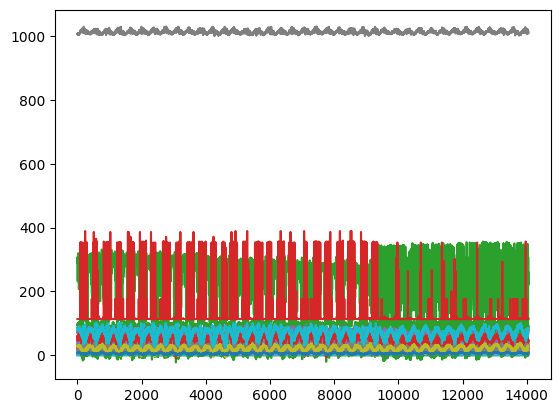

In [9]:
df1.plot(legend=False)

<Axes: >

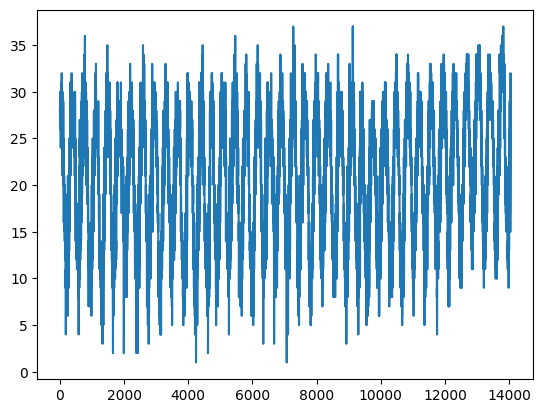

In [10]:
df1['avgtempC'].plot()

In [11]:
df1['date']

0        2008-07-01
1        2008-07-02
2        2008-07-03
3        2008-07-04
4        2008-07-05
            ...    
14044    2021-04-22
14045    2021-04-23
14046    2021-04-24
14047    2021-04-25
14048    2021-04-26
Name: date, Length: 14049, dtype: object